In [5]:
import pandas
pandas.set_option('display.max_columns', 10)
pandas.set_option('display.width', 350)
  
#read from google drive
data=pandas.read_csv("https://drive.google.com/uc?export=download&id=1KvxyyF3QCtvIx0J7_8iWDEtFQpLgd0Yq")

In [2]:
data.head(n=5)

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [9]:
data.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [14]:
data.isna().sum(axis = 0)

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

In [57]:
import matplotlib
from matplotlib import rcParams
#rcParams.update({'figure.autolayout': True})
from matplotlib import pyplot as plt
%matplotlib inline

(array([ 48450.,      0.,      0., 178092.,      0.,      0.,  76602.,
             0.,      0.,  13056.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

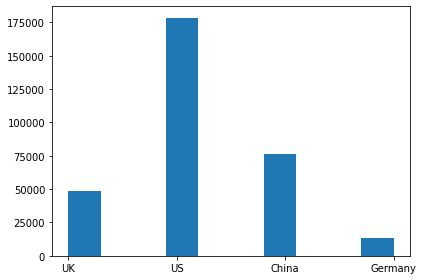

In [25]:
plt.hist(data['country'])

In [36]:
round(data.groupby(['country']).sum()/data.groupby(['country']).count(), 2)

,age,converted,new_user,source,total_pages_visited
country,,,,,
China,30.67,0.00,0.70,NaN,4.55
Germany,30.45,0.06,0.68,NaN,5.19
UK,30.45,0.05,0.68,NaN,5.08
US,30.57,0.04,0.68,NaN,4.93


In [39]:
data.groupby(['source']).sum()/data.groupby(['source']).count()

,age,converted,country,new_user,total_pages_visited
source,,,,,
Ads,30.534742,0.034483,NaN,0.685700,4.899538
Direct,30.567978,0.028169,NaN,0.686854,4.816901
Seo,30.590835,0.032895,NaN,0.684681,4.883946


In [47]:
import seaborn as sns

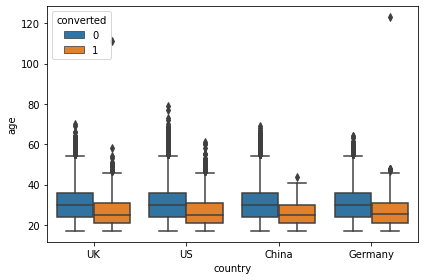

In [49]:
sns.boxplot(data['country'], data['age'], hue = data['converted'])

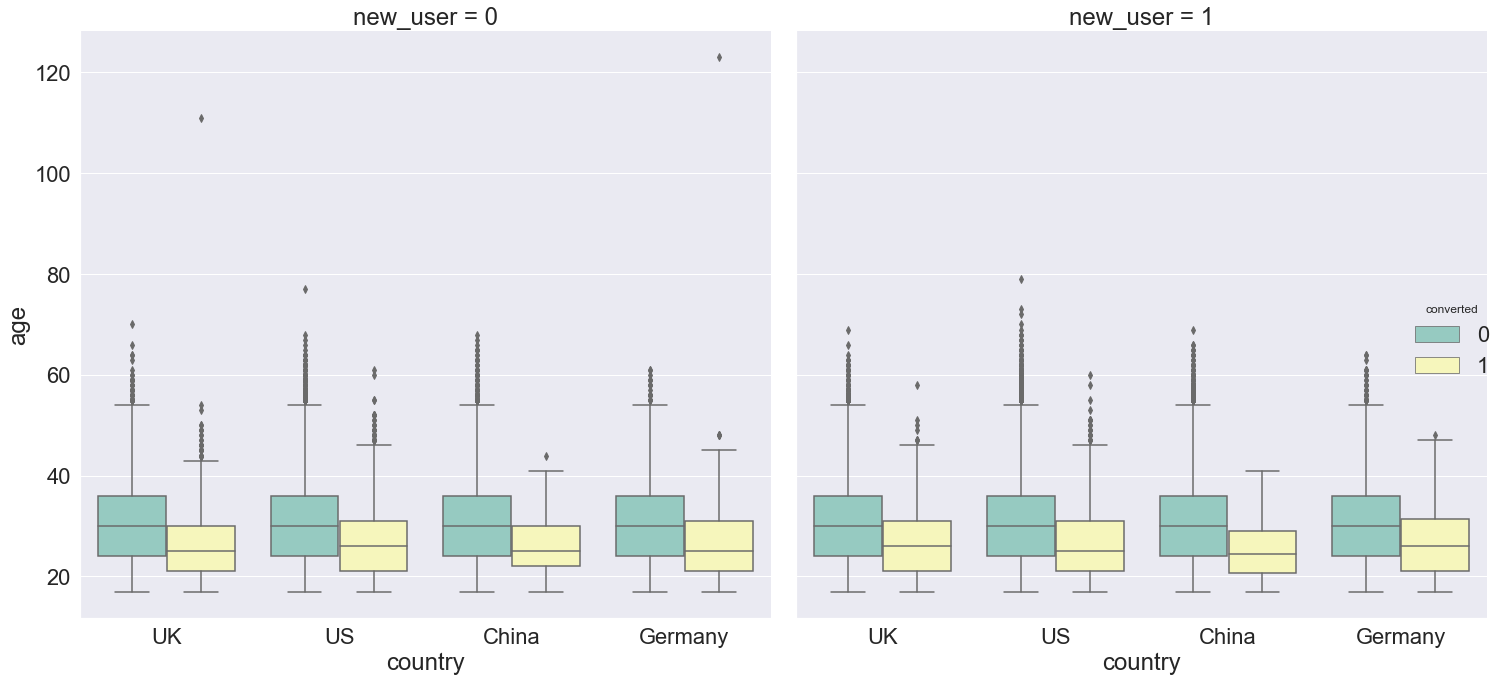

In [100]:
#sns.set(rc={'figure.figsize':(40,40)})
#plt.figure(figsize=(20,20))
sns.set(font_scale=2) 
cat_plot = sns.catplot(x="country", y="age",
                hue="converted", col="new_user",
                data=data, kind="box", palette="Set3",
                height=10, aspect=1, legend = True, dodge=True);


Country wise distribution of age is uniform between old and new user; Converted Users come from a lower age group

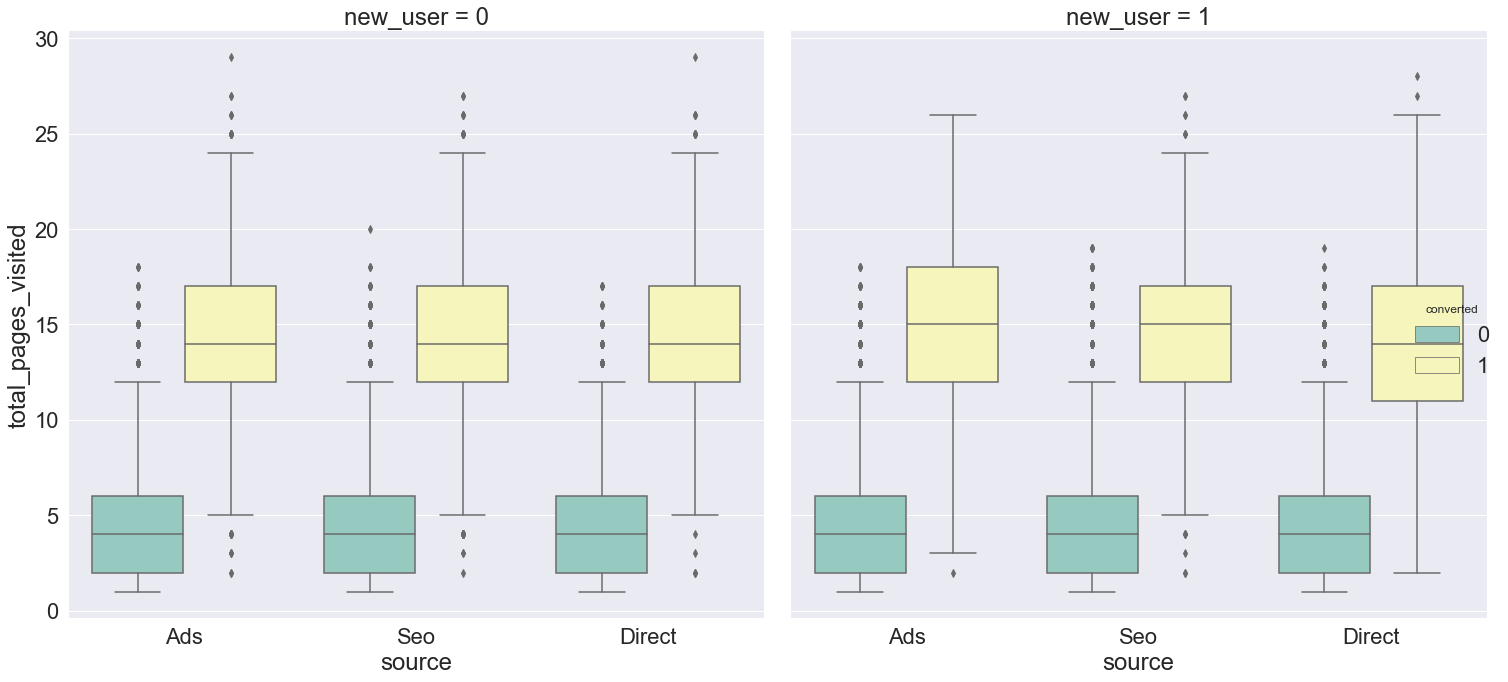

In [102]:
sns.set(font_scale=2) 
cat_plot = sns.catplot(x="source", y="total_pages_visited",
                hue="converted", col="new_user",
                data=data, kind="box", palette="Set3",
                height=10, aspect=1, legend = True, dodge=True);


**new user(converted) has more no of pages visit
as it should be**

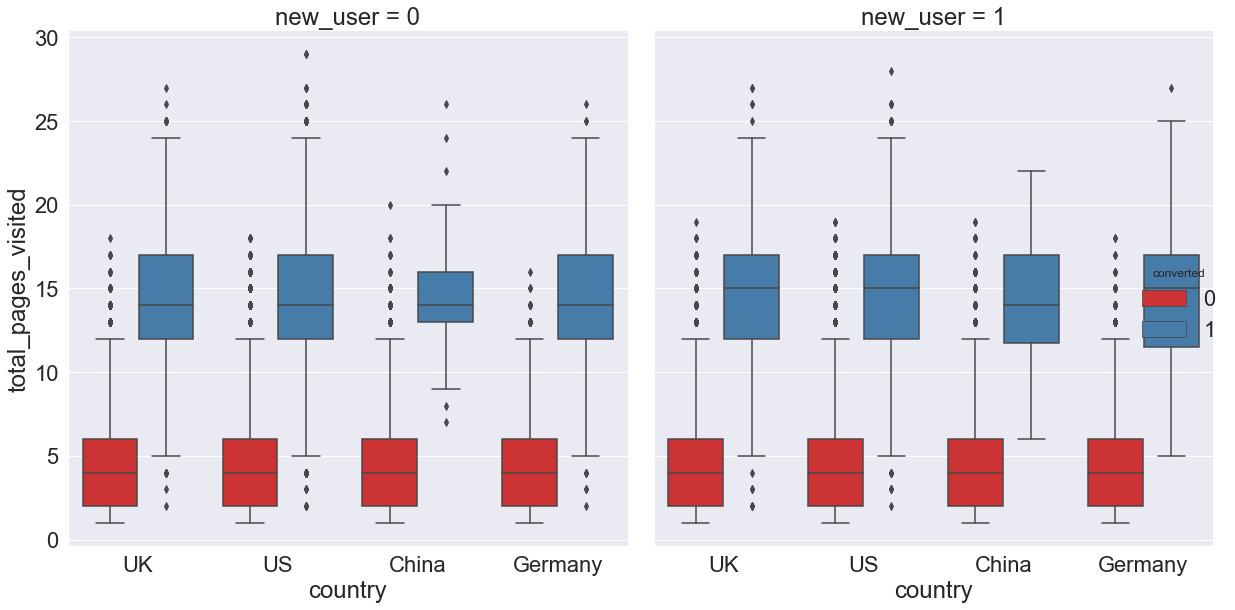

In [110]:
sns.set(font_scale = 2)
sns.catplot(x = 'country', y = 'total_pages_visited', col = 'new_user', hue = 'converted',
           data = data, kind = 'box', palette = 'Set1', height = 9, aspect = 0.9)

**Country wise page view distribution is uniform**

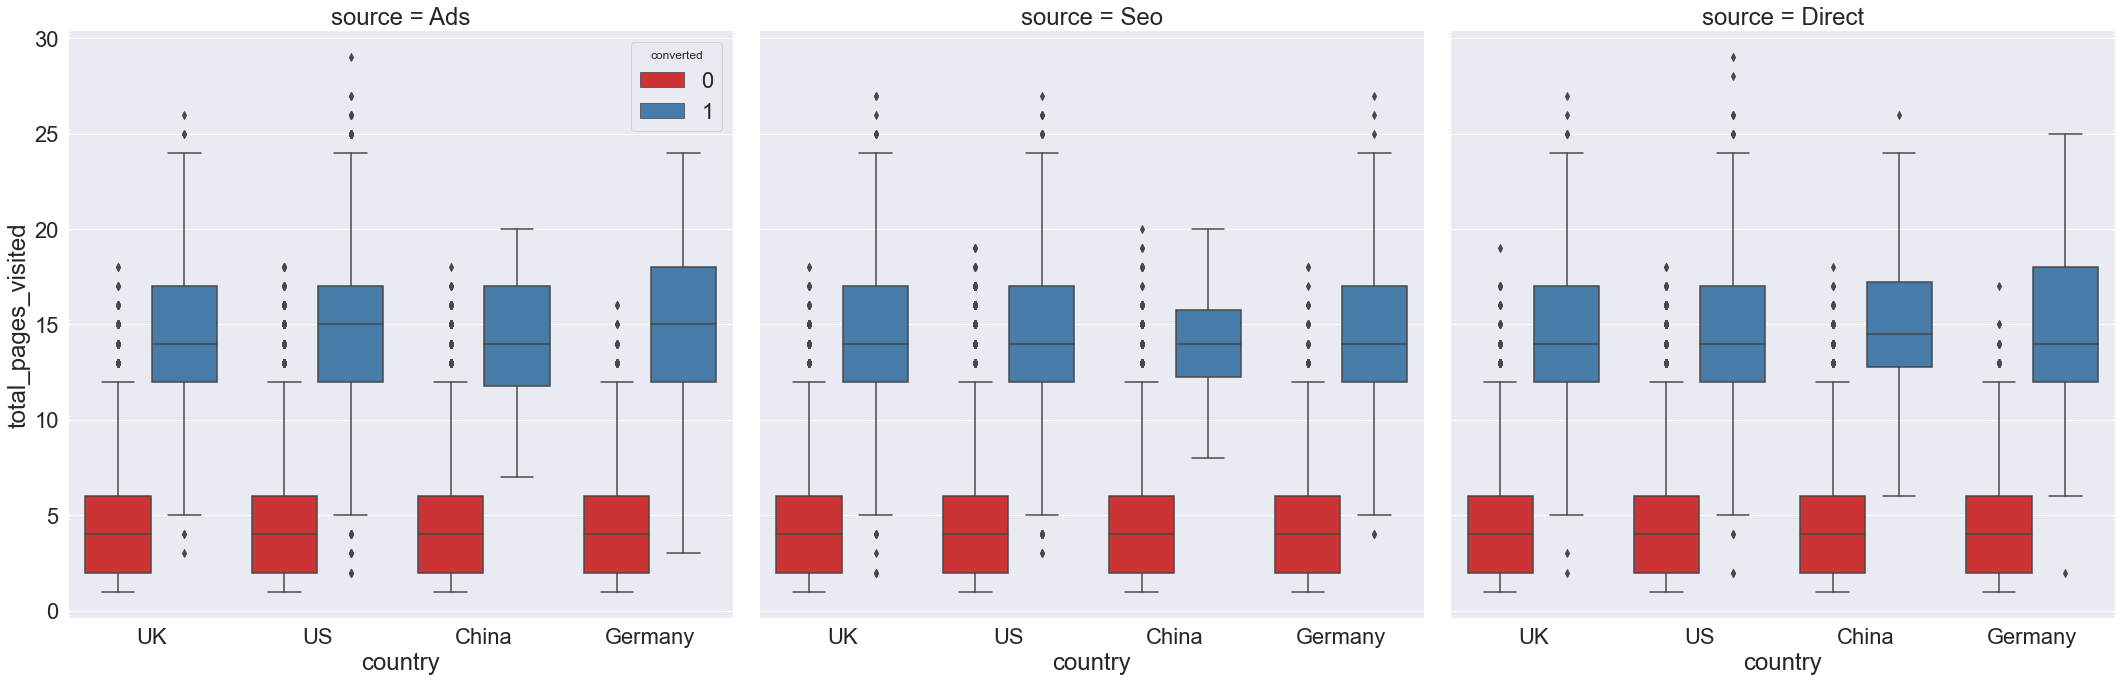

In [115]:
sns.set(font_scale = 2)
sns.catplot(x = 'country', y = 'total_pages_visited', col = 'source', hue = 'converted',
           data = data, kind = 'box', palette = 'Set1', height = 10, aspect = 1, legend_out = False)

**US and Germany has more conversions from Ads; For rest of the countries, distribution is uniform across sources**

In [122]:
data.groupby(['source']).sum()/data.groupby(['source']).count()

,age,converted,country,new_user,total_pages_visited
source,,,,,
Ads,30.534742,0.034483,NaN,0.685700,4.899538
Direct,30.567978,0.028169,NaN,0.686854,4.816901
Seo,30.590835,0.032895,NaN,0.684681,4.883946


**ADs have more probability of conversion**

# Removing Outliers

In [6]:
data = data[data['age']<110]

In [124]:
data.count()

country                316198
age                    316198
new_user               316198
source                 316198
total_pages_visited    316198
converted              316198
dtype: int64

In [147]:
data.groupby(['source'])['converted'].sum()/data.groupby(['source'])['converted'].count()

source
Ads       0.034472
Direct    0.028169
Seo       0.032888
Name: converted, dtype: float64

In [148]:
data.groupby(['country'])['converted'].sum()/data.groupby(['country'])['converted'].count()

country
China      0.001332
Germany    0.062428
UK         0.052612
US         0.037801
Name: converted, dtype: float64

In [155]:
100*data[data['source']=='Ads'].groupby(['country'])['converted'].sum()/data[data['source']=='Ads'].groupby(['country'])['converted'].count()

country
China      0.148416
Germany    6.675532
UK         5.555967
US         4.058035
Name: converted, dtype: float64

In [159]:
100*data[data['source']=='Seo'].groupby(['country'])['converted'].sum()/data[data['source']=='Seo'].groupby(['country'])['converted'].count()

country
China      0.122412
Germany    6.390919
UK         5.390530
US         3.850784
Name: converted, dtype: float64

In [158]:
100*data[data['source']=='Direct'].groupby(['country'])['converted'].sum()/data[data['source']=='Direct'].groupby(['country'])['converted'].count()

country
China      0.137433
Germany    5.342179
UK         4.626718
US         3.290855
Name: converted, dtype: float64

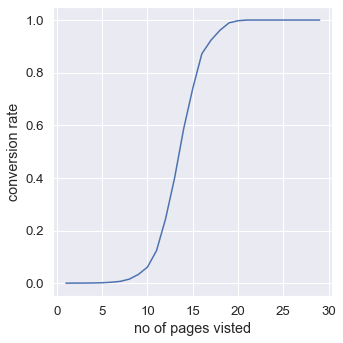

In [169]:
sns.set(font_scale = 1.2)
plt.figure(figsize=(5,5))
data.groupby(['total_pages_visited'])['converted'].mean().plot()
plt.xlabel('no of pages visted')
plt.ylabel('conversion rate')
plt.show()

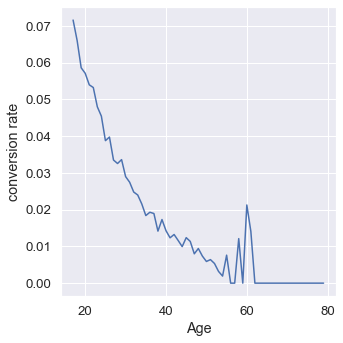

In [180]:
sns.set(font_scale = 1.2)
plt.figure(figsize=(5,5))
data.groupby(['age'])['converted'].mean().plot()
plt.xlabel('Age')
plt.ylabel('conversion rate')
plt.show()

In [198]:
?seaborn.distplot()

Object `seaborn.distplot()` not found.


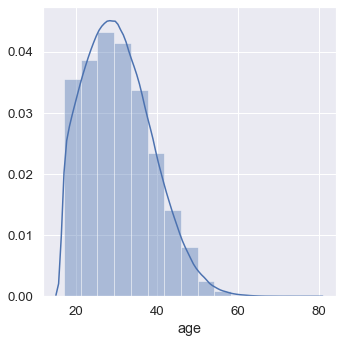

In [201]:

sns.set(font_scale = 1.2)
plt.figure(figsize=(5,5))
sns.distplot(data['age'], bins =15)

In [213]:
a = data['age'].unique()
a.sort()
a

array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 72, 73, 77, 79])

# Model Building

It is a Classification problem and the output ('converted') is binary (0/1)
The features:

Age (quantitative) : 17 -  79
Source (categorical) : Ads, Seo, direct
Country (categorical) : US, UK, China, Germany
Page_views  (Quantitaive) : No of pages visited (time spent on the website)
New User (Binary) : 0/1 


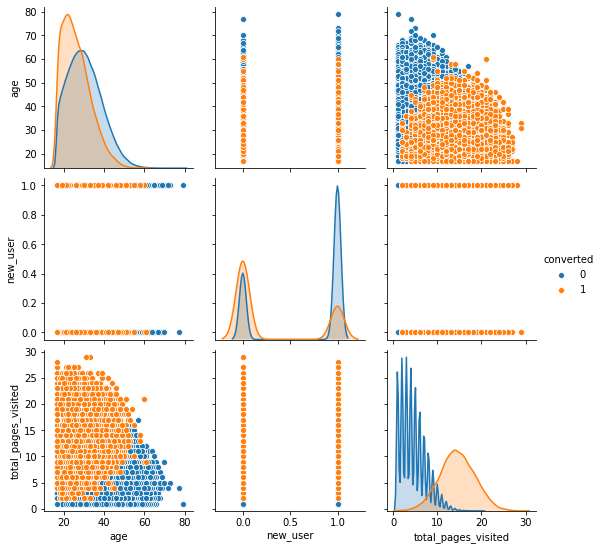

In [88]:
sns.pairplot(data, hue = 'converted')

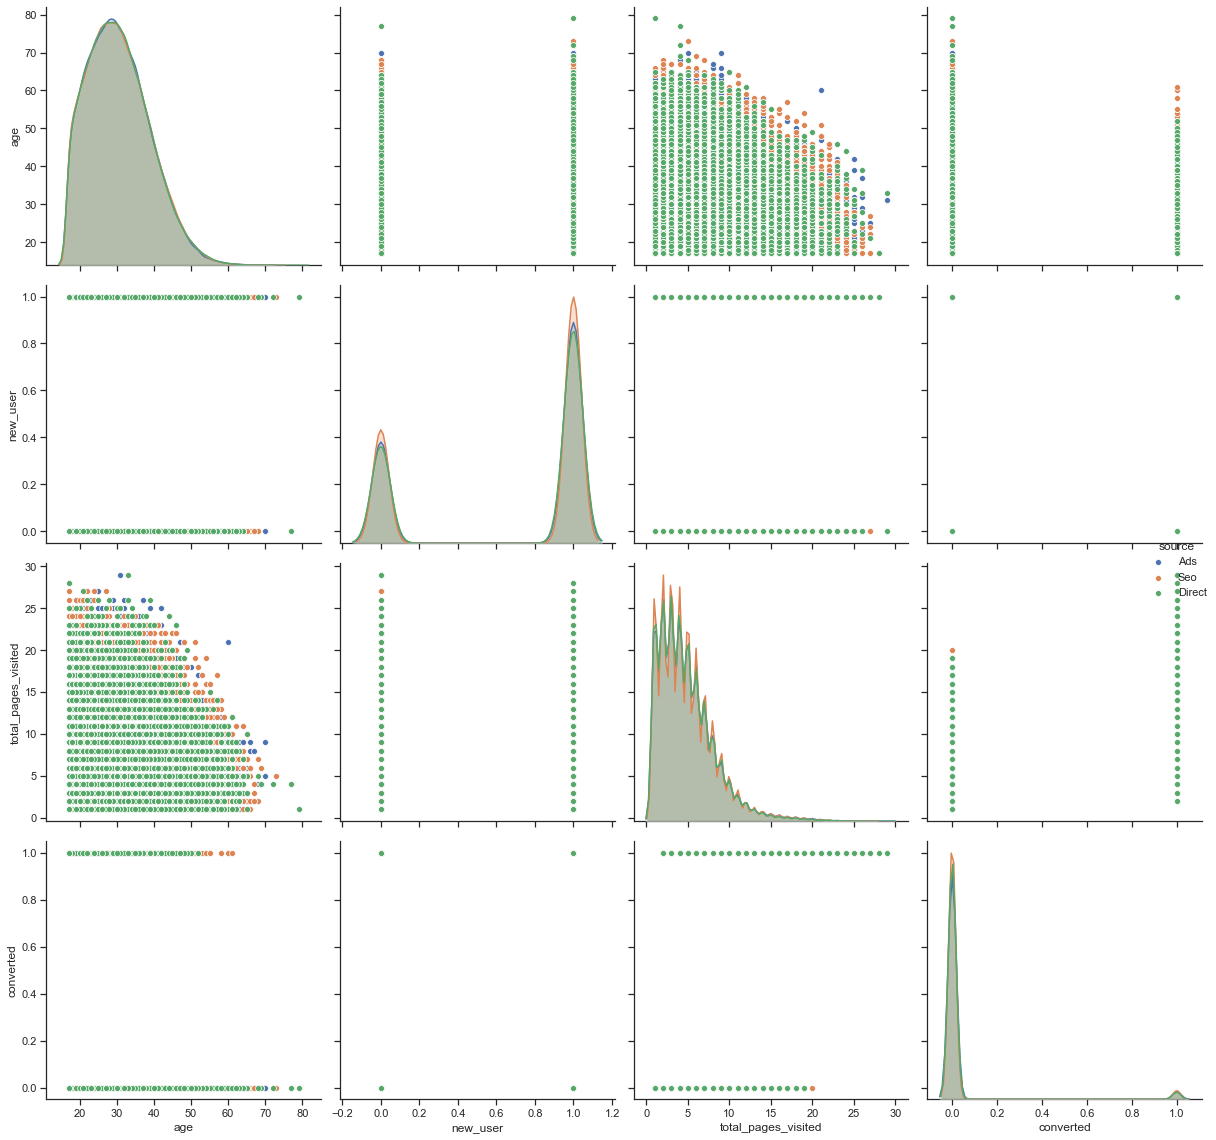

In [223]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(data, hue = 'source', height = 4, aspect = 1 )

In [7]:
data_dummy = pandas.get_dummies(data, drop_first=True)

In [72]:
X = data_dummy.drop('converted', axis = 1)
y = data_dummy['converted']

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [11]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [246]:
y.head(n = 5)

0    0
1    0
2    0
3    0
4    0
Name: converted, dtype: int64

In [12]:
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size = 0.3)

In [254]:
X_train.shape

(221338, 8)

In [310]:
lr = LogisticRegression(verbose = True, random_state= 10001)
lrcv = LogisticRegressionCV(cv = 5, verbose = 1, random_state= 101)
lrcv2 = LogisticRegressionCV(cv = 10, verbose = 1, random_state= 42)

In [233]:
?LogisticRegressionCV

In [255]:
lr.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=True,
                   warm_start=False)

In [257]:
y_predict = lr.predict(X_test)

In [112]:
from sklearn.metrics import confusion_matrix
'''
Class: Confusion Matrix
Calculates Various Statistical Parameters of Model Prediction
Like FPR, Sensitivity, Specificity, Accuracy
'''
class CF():
    '''
    Class Constructor
    y_test : True value of dependent variable,  array
    y_predict: Predicted value of dv, array
    '''
    def __init__(self, y_test, y_predict):
        self.y_predict = y_predict
        self.y_test = y_test
        self.tn, self.fp, self.fn, self.tp = confusion_matrix(self.y_test, self.y_predict).ravel()
    
    def sensitivity(self): 
        '''
        Recall, power, Sensitivity, TPR, Hit Rate
        TP/(TP+FN)
        TPR = 1- FNR  (1-Type II error)'''
        return(self.tp/(self.tp+self.fn))
    
    def precision(self):
        '''
        Precision, Positive Prediction Value (PPV)
        1- FDR 
        '''
        return(self.tp/(self.tp+self.fp))
    
    def specificity(self):
        '''
        Selectivity, Specificity, TNR,
        1- FPR (1-Type I error) '''
        return(self.tn/(self.tn+self.fp))
    
    def accuracy(self):
        return((self.tp+self.tn)/(self.tp+self.fp+self.fn+self.tn))

    
    def F1_score(self):
        '''
        Harmonic mean of Precision and Sensitivity
        2/F1 = 1/Precision + 1/Sensitivity
        F1 = 2.TP/(2.TP+FN+FP)
        '''
        return(2*self.tp/(2*self.tp+self.fn+self.fp))
        
    def CSI(self):
        '''
        Critical Success Index, Threat Score
        TP/(TP+FP+FN)'''
        
        return(self.tp/(self.tp+self.fn+self.fp))

      

In [299]:
cf = CF(y_test, y_predict)

In [319]:
cf = CF(y_test, y_predict)
print('accuracy:', round(100*cf.accuracy(), 2))
print('Recall:', round(100*cf.sensitivity(),2))
print("Precision:", round(100*cf.precision(),2))
print('FPR:', round(100*(1-cf.specificity()),2))
print('F1 Score:', cf.F1_score())
print('CSI:', cf.CSI())

accuracy: 98.68
Recall: 70.07
Precision: 86.03
FPR: 0.37
F1 Score: 0.7723710588664116
CSI: 0.6291567695961995


In [311]:
lrcv.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.9s finished


LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=101, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=1)

In [313]:
y_predict2 = lrcv.predict(X_test)

In [314]:
cf2 = CF(y_test, y_predict2)

In [316]:
print('accuracy:', round(100*cf2.accuracy(), 2))
print('Recall:', round(100*cf2.sensitivity(),2))
print("Precision:", round(100*cf2.precision(),2))
print('FPR:', round(100*(1-cf2.specificity()),2))
print('F1 Score:', cf2.F1_score())
print('CSI:', cf2.CSI())

accuracy: 98.68
Recall: 69.78
Precision: 86.05
FPR: 0.37
F1 Score: 0.7706355003652301
CSI: 0.6268568033273916


In [321]:
lrcv2.fit(X_train, y_train)
y_pred3 = lrcv2.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   10.8s finished


In [323]:
cf3 = CF(y_test, y_pred3)

In [324]:
print('accuracy:', round(100*cf3.accuracy(), 2))
print('Recall:', round(100*cf3.sensitivity(),2))
print("Precision:", round(100*cf3.precision(),2))
print('FPR:', round(100*(1-cf3.specificity()),2))
print('F1 Score:', cf3.F1_score())
print('CSI:', cf3.CSI())

accuracy: 98.68
Recall: 69.78
Precision: 86.05
FPR: 0.37
F1 Score: 0.7706355003652301
CSI: 0.6268568033273916


In [328]:
confusion_matrix(y_test, y_predict)

array([[91492,   344],
       [  905,  2119]])

In [329]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# visualising multidimensional binary data

In [334]:
lda = LinearDiscriminantAnalysis()


In [13]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(n_components=5)

In [4]:
?pca

In [24]:
X_transformed = pca.fit_transform(X_test)

In [17]:
from matplotlib import pyplot as plt 

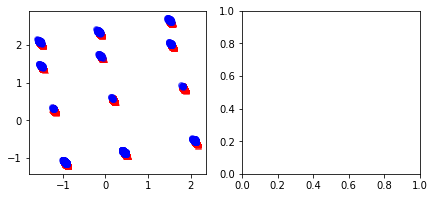

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))

ax[0].scatter(X_transformed[y_test==0, 0], X_transformed[y_test==0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_transformed[y_test==1, 0], X_transformed[y_test==1, 1],
             color='blue', marker='o', alpha=0.5)

In [20]:
pca.components_

array([[ 0.00435591,  0.00152375, -0.01506285, -0.05480869, -0.1126922 ,
         0.13947634,  0.69443589, -0.6945167 ],
       [-0.01643867,  0.00148177,  0.0111508 ,  0.22534806,  0.63987407,
        -0.7101952 ,  0.13154833, -0.13304317]])

In [25]:
pca.explained_variance_ratio_

array([0.19098004, 0.1880418 , 0.13833401, 0.13443764, 0.12341835])

In [32]:
pca.get_params

<bound method BaseEstimator.get_params of PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)>

In [73]:
from sklearn.feature_selection import SelectKBest, chi2

In [74]:
?SelectKBest

In [75]:
X_new = SelectKBest(mutual_info_regression, k =2).fit_transform(data_dummy.drop('converted', axis =1), data_dummy['converted'])

In [65]:
X_new.shape

(316198, 2)

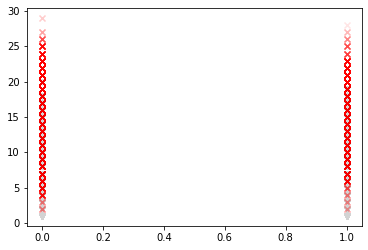

In [76]:
plt.scatter(X_new[y==0, 0], X_new[y==0,1], color='lightgray', marker='v', alpha=0.5)
plt.scatter(X_new[y==1, 0], X_new[y==1, 1],
             color='red', marker='x', alpha=0.1)

In [42]:
?plt.scatter

# KNN classifier

In [77]:
import pandas
pandas.set_option('display.max_columns', 10)
pandas.set_option('display.width', 350)
  
#read from google drive
data=pandas.read_csv("https://drive.google.com/uc?export=download&id=1KvxyyF3QCtvIx0J7_8iWDEtFQpLgd0Yq")

In [78]:
data = data[data['age']<110]

In [82]:
import matplotlib
from matplotlib import rcParams
#rcParams.update({'figure.autolayout': True})
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [79]:
data_dummy = pandas.get_dummies(data, drop_first=True)
X = data_dummy.drop('converted', axis = 1)
y = data_dummy['converted']

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [81]:
sc = StandardScaler()
X = sc.fit_transform(X)
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size = 0.3)

In [87]:
data.columns

Index(['country', 'age', 'new_user', 'source', 'total_pages_visited', 'converted'], dtype='object')

In [90]:
neighbors = list(range(1,30,2))

In [91]:
neighbors

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]

In [92]:
?KNeighborsClassifier

In [93]:
?cross_val_score

In [96]:
cv_scores = []
for K in neighbors:
    knn = KNeighborsClassifier(n_neighbors = K)
    print("K: ", K)
    scores = cross_val_score(knn,X_train,y_train,cv = 10,scoring =
    "accuracy")
    print("Scores: ", scores.mean())
    cv_scores.append(scores.mean())

K:  1
Scores:  0.9781646208007121
K:  3
Scores:  0.9835861865030276
K:  5
Scores:  0.984697612282248
K:  7
Scores:  0.9850861619404621
K:  9
Scores:  0.9853707941668803
K:  11
Scores:  0.9855515134522902
K:  13
Scores:  0.9855605487123237
K:  15
Scores:  0.9855289229547498
K:  17
Scores:  0.9856283173471713
K:  19
Scores:  0.9856599429006186
K:  21
Scores:  0.9857548207857205
K:  23
Scores:  0.9857638562498803
K:  25
Scores:  0.9858180733215015
K:  27
Scores:  0.9858632528876958
K:  29
Scores:  0.9859536118159571


# Should you use kNN?

The answer to this question, as the answer often is in data science is “It depends.” kNN is simple to use and can return very accurate and meaningful results. **It also has a tendency to be computationally expensive, so it may not be your best choice for larger datasets. If you have a larger dataset with a binary classification, a simple logistic regression may be a better choice.** In other cases, a random forest classifier could be a better choice. If you have the time, it’s always a good idea to try out as many models as possible to get the most accurate predictions in machine learning.

In [97]:
neighbors2 = list(range(40,50,4))

In [ ]:
neighbors2

In [104]:
knn2 = KNeighborsClassifier(n_neighbors = 11)
scores = cross_val_score(knn,X_train,y_train,cv = 10,scoring =
    "recall")
scores.mean()

0.6746729467131047

In [ ]:
cv_scores_recall = []
for K in neighbors:
    knn = KNeighborsClassifier(n_neighbors = K)
    scores = cross_val_score(knn,X_train,y_train,cv = 10,scoring =
    "recall")
    cv_scores_recall.append(scores.mean())

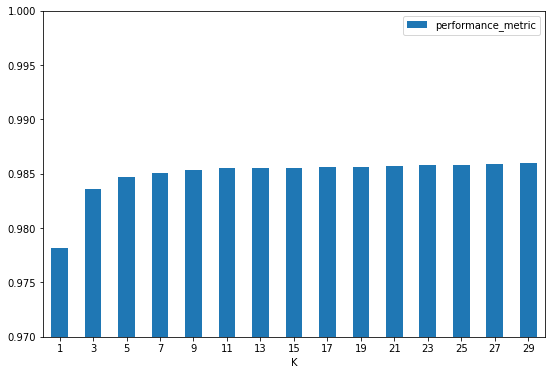

In [102]:

import pandas as pd

def plot_performance(neighbors, knn_list_scores):
    pd.DataFrame({"K":neighbors, "performance_metric":knn_list_scores}).set_index("K").\
    plot.bar(figsize= (9,6),ylim=(0.97,1),rot=0)
    plt.show()
    
    
    
plot_performance(neighbors, cv_scores)
#plot_performance(neighbors, cv_scores_recall)

# KNN is not performing better than Logistic Regression Here

Data is imbalanced and has non-linear decision boundary; however data is large is size and non-sparse; so KNN is not a best choice because of computation limitations

In [107]:
from sklearn.linear_model import SGDClassifier

from sklearn.svm import SVC

In [114]:
?SGDClassifier

In [123]:
?SVC

**Baseline non-linear SVM classifier**

In [109]:
model = SVC(gamma = 'auto', verbose = True)

In [110]:
model.fit(X_train, y_train)

[LibSVM]

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=True)

In [111]:
y_pred_svm = model.predict(X_test)

In [113]:
cf = CF(y_test, y_pred_svm)
print('accuracy:', round(100*cf.accuracy(), 2))
print('Recall:', round(100*cf.sensitivity(),2))
print("Precision:", round(100*cf.precision(),2))
print('FPR:', round(100*(1-cf.specificity()),2))
print('F1 Score:', cf.F1_score())
print('CSI:', cf.CSI())

accuracy: 98.54
Recall: 64.23
Precision: 86.65
FPR: 0.33
F1 Score: 0.7377390645711039
CSI: 0.5844584458445845


**This has performed worse than Logistic Regression**

In [116]:
model2 = SGDClassifier(loss = 'hinge', verbose = True)

In [117]:
model2.fit(X_train, y_train)

-- Epoch 1
Norm: 2.61, NNZs: 8, Bias: -5.424238, T: 221338, Avg. loss: 0.089899
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 2.13, NNZs: 8, Bias: -4.699741, T: 442676, Avg. loss: 0.040618
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1.98, NNZs: 8, Bias: -4.277839, T: 664014, Avg. loss: 0.038959
Total training time: 0.08 seconds.
-- Epoch 4
Norm: 1.95, NNZs: 8, Bias: -4.314277, T: 885352, Avg. loss: 0.038086
Total training time: 0.11 seconds.
-- Epoch 5
Norm: 1.93, NNZs: 8, Bias: -4.206661, T: 1106690, Avg. loss: 0.037706
Total training time: 0.14 seconds.
-- Epoch 6
Norm: 1.75, NNZs: 8, Bias: -4.259470, T: 1328028, Avg. loss: 0.037499
Total training time: 0.17 seconds.
-- Epoch 7
Norm: 1.85, NNZs: 8, Bias: -4.172066, T: 1549366, Avg. loss: 0.037399
Total training time: 0.20 seconds.
-- Epoch 8
Norm: 1.81, NNZs: 8, Bias: -4.127332, T: 1770704, Avg. loss: 0.037234
Total training time: 0.22 seconds.
Convergence after 8 epochs took 0.22 seconds


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=True, warm_start=False)

In [118]:
y_predict_linsvm = model2.predict(X_test)

In [119]:
cf = CF(y_test, y_predict_linsvm)
print('accuracy:', round(100*cf.accuracy(), 2))
print('Recall:', round(100*cf.sensitivity(),2))
print("Precision:", round(100*cf.precision(),2))
print('FPR:', round(100*(1-cf.specificity()),2))
print('F1 Score:', cf.F1_score())
print('CSI:', cf.CSI())

accuracy: 98.58
Recall: 66.9
Precision: 85.4
FPR: 0.38
F1 Score: 0.7502310963209465
CSI: 0.6002958579881656


In [122]:
from sklearn.model_selection import GridSearchCV

In [125]:
grid_params = {
    'C':[1e-03, 1e-01, 1.0, 1e2, 1e3, 1e5],
    'kernel': ['rbf', 'poly'],
       
}

gs = GridSearchCV(SVC(),
                 grid_params,
                 verbose = True)

In [ ]:
gs.results.best_scores_

In [ ]:
gs.results.best_estimator_

In [ ]:
gs.results.best_params_